# Linear Regression

## Fittin' Lines to Data
#### Dan Wiesenthal

# Objectives - Morning

- Linear regression overview
    - Fitting a line
    - Linear relationshiops, Exact vs Inexact
    - Where do we put the line? What is our error metric?
- Expressing our model
    - $y = Mx + b$
    - $Y = \beta_0 + \beta_1 X + \epsilon$
    - Matrix representation
- How good is our model?
    - $RSS$
    - $RSE$ aka $RMSE$
    - $R^2$  
        - Fraction of variance explained, or, $1 - FUV$
- Compare models (against null)
    - Are all my coefficients not zero?
    - Are some new coefficients not zero?
- Interpreting model output
    - Interpret coefficients from statsmodels
- Assumptions of Linear Regression
    - Linearity
    - Constant Variance (Homoscedasticity)
    - Independence of Errors
    - Normality of Errors
    - Lack of Multicollinearity
- Outliers
    - Types of outliers
    - Detecting outliers
        - Leverage (change in prediction over change in actual)
        - Studentized Residuals
    - Residual plots
- Multicollinearity
    - Perfect
    - Partial
- QQ Plots
    - (Video, ragequit)

# Linear Regression Overview
### Fitting a line
### Linear relationships, Exact vs Inexact
### Where do we put the line?  What is our error metric?

# Linear Regression Overview
### Linear relationships, Exact vs Inexact
<img src="images/exact_inexact.png"></img>

# Linear Regression Overview
### Where do we put the line? What is our error metric?
<img src="images/line_placement.png"></img>
- Notes on image:
    - There are many lines possible
    - We don't want to minimize the absolute error, since that could tell us that we have 0 error when we clearly don't have 0 error (upper right)
    - We'll minimize squared error

# Expressing our model
## Simple (Bivariate) Linear Regression

- The World
    - what you're presuming the world looks like:
    $$Y = \beta_0 + \beta_1X + \epsilon$$


- $\beta_0$ and $\beta_1$ are unknown constants that represent the intercept and slope
- $\epsilon$, the error term, is i.i.d $N(0, \sigma^2)$
_______
- The Model
    - what you've created from data to estimate the world:
    $$\hat{y} = \hat{\beta_0} + \hat{\beta_1}x$$
- $\hat{\beta_0}$ and $\hat{\beta_1}$ are model coefficient estimates
- $\hat{y}$ indicates the prediction of $Y$ based on $X=x$


# Expressing our model
## Multiple Linear Regression
- Model in matrix form
<img src="images/matrix_form.png"></img>
- Design Matrix $X$
<img src="images/design_matrix.png"></img>
- Coefficient Matrix $\beta$
<img src="images/coefficient_matrix.png"></img>

# How good is our model?
### RSS
$RSS = SSE = \sum_{i=1}^{n}{(y_i - \hat{y_i})^2}$
- How far off were we? In, um, raw units (squared).
 
### RSE (aka  RMSE)
$RSE = RMSE = \sqrt{\frac{RSS}{n - p - 1}} = \sqrt{\frac{\sum_{i=1}^{n}{(y_i - \hat{y_i})^2}}{n - p - 1}}$
- How far off were we? For, y'know, a typical point. On average. (Controlling for degrees of freedom lost.)
- Similarly, we have the standard error (biased or not depending on dof), $\frac{\sum_{i=1}^{n}{(y_i - \hat{y_i})^2}}{n - p - 1}$
 
### R^2
$1 - FUV = 1 - \frac{Deviation_u}{Deviation_t}$
- Total deviation, $Deviation_t$: $(y_1 - \bar{y})$
- Explained deviation, $Deviation_e$: $(\hat{y_1} - \bar{y})$
- Unexplained deviation, $Deviation_u$: $(y_1 - \hat{y_1})$

<img src="images/tight_loose_fit.png"></img>
<img src="images/rss.png"></img>
<img src="images/r_squared_examples.png"></img>
- Notes on images:
    - We can have two lines with the same slope and intercept, each of which is the best fit line, and they can still be differently "good" fits if the data is spread out
    - If we didn't have a model, we would just predict the mean, so that's what we compare ourselves against to see how good our model is
    - We could have data that clearly has a signal but a low $R^2$ if we aren't properly modeling it; low $R^2$ isn't necessarily grounds for concluding there's no signal

# Comparing Models
### Did I add a useful feature?
1) Set up hypotheses, comparison

$H_0: \beta_{height} = \beta_{color} = 0$

$H_A:$ at least one of $\beta_{height}$ or $\beta_{color}$ is nonzero



Reduced Model: $$Y = \beta_0 + \beta_{weight} + \beta_{modelyear} + \beta_{cartype}$$

Full Model: $$Y = \beta_0 + \beta_{weight} + \beta_{modelyear} + \beta_{cartype} + \beta_{height} + \beta_{color}$$

(X's omitted for clarity)

2) Compute F-statistic
$$F = \frac{\frac{(RSS_{reduced} - RSS_{full})}{(p_{full} - p_{reduced})}}{\frac{RSS_{full}}{(n - p_{full} -1)}}$$

3) Compute p-value

p_val = 1 - scipy.stats.f.cdf(calculated_F, p_full - p_reduced, n - p_full - 1)

______
### Are any of my features useful?
1) Set up hypotheses
$H_0: \beta_1 = \beta_2 = \beta_3 = ... = \beta_p = 0$

$H_A:$ at least one $\beta_j$ is nonzero

2) $F = \frac{\frac{TSS - RSS}{p}}{\frac{RSS}{n - p - 1}}$ ~ $F_{p, n - p - 1}$

_______
<img src="images/significance_testing.png"></img>



# Interpreting Model Output

### Interpreting coefficients from statsmodels


In [1]:
import numpy as np
import random
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt
%matplotlib inline

/Users/dan/.virtualenvs/linear_regression_lecture/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [7]:
df_gnp = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/datasets/longley.csv', index_col=0)
df_gnp.head()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221


In [3]:
X = df_gnp.GNP  # Set up our design matrix, X
X = sm.add_constant(X)  # We need to manually add a constant, aka intercept, when working with statsmodels
y = df_gnp.Employed # Set up our target, y

In [8]:
est = sm.OLS(y, X)
est = est.fit()
est.summary()  # whoa, too much output for the moment

# a utility function to only show the coefficient section of summary
from IPython.core.display import HTML
def short_summary(est):
    return HTML(est.summary().tables[1].as_html())

short_summary(est)

,coef,std err,t,P>|t|,[0.025,0.975]
const,51.8436,0.681,76.087,0.000,50.382,53.305
GNP,0.0348,0.002,20.374,0.000,0.031,0.038


Talking points on short summary:
- sanity check
- constant, GNP coefficients
- do they point the right direction
- rough magnitude check (if you have a sense)
- are the p values significant
- oh hey look we have confidence intervals, that's nice

In [5]:
est.summary()  # now let's look at the full summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Employed   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     415.1
Date:                Mon, 15 May 2017   Prob (F-statistic):           8.36e-12
Time:                        23:10:49   Log-Likelihood:                -14.904
No. Observations:                  16   AIC:                             33.81
Df Residuals:                      14   BIC:                             35.35
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.8436      0.681     76.087      0.000      50.382      53.305
GNP            0.0348      0.002     20.374      0.000       0.031       0.038
==============================================================================
Omnibus:                        1.925   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.215
Skew:                           0.664   Prob(JB):                        0.545
Kurtosis:                       2.759   Cond. No.                     1.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Let's plot it

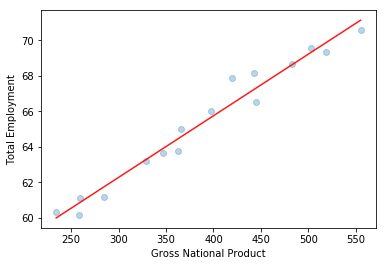

In [6]:
# We pick 100 hundred points equally spaced from the min to the max
X_prime = np.linspace(X.GNP.min(), X.GNP.max(), 100)[:, np.newaxis]
X_prime = sm.add_constant(X_prime)  # add constant as we did before

# Now we calculate the predicted values
y_hat = est.predict(X_prime)

plt.scatter(X.GNP, y, alpha=0.3)  # Plot the raw data
plt.xlabel("Gross National Product")
plt.ylabel("Total Employment")
plt.plot(X_prime[:, 1], y_hat, 'r', alpha=0.9)  # Add the regression line, colored in red

# Assumptions of Linear Regression
- Assumptions of Linear Regression
    - Linearity
        - We assume it's possible
    - Constant Variance (Homoscedasticity)
        - Our variance shouldn't change as y or X gets bigger
    - Independence of Errors
        - We should gain no information from knowing the error of a different data point
    - Normality of Errors
        - Errors should be normally distributed
    - Lack of Multicollinearity
        - We shouldn't be measuring the same thing in multiple ways
        
We can't always meet these assumptions, and often have to find ways to combat that reality.


<img src="images/residual_plots.png"></img>
Notes on image:
- a looks lovely
- b has some extreme outliers
- c is curvilinear; a change in x does not lead to the same response in y across all values of x
- d violates homoscedasticity; the error variance is not constant but rather depends on x
- e indicates a linear relationship between the residuals and a variable not in the model; we probably want to try to find/measure that variable and add it into our model

# Outliers
- Outliers
    - Types of outliers
    - Detecting outliers
        - Leverage (change in prediction over change in actual)
        - Studentized Residuals
    - Residual plots

# Outliers
### Types of outliers
<img src="images/types_of_outliers.png"></img>



# Outliers
## Detecting outliers

### Visually
We can make a **residual plot** to help identify outliers visually.  In this case, we plot the residuals by the fitted/predicted value, y.

Even better, we can **standardize** by dividing by the standard error.  This allows us to see which points are outliers in a common way, perhaps by checking whether they're above or below 2 (roughly 95% of our data is covered by that region).

<img src="images/standardized_residuals.png"></img>

Even better still, we can **"Studentize"** the errors by dividing, not by the "global" standard error for our model, but by the standard error of our model at the particular value of y where the residual occurred.  Our confidence intervals change depending on how much data we have seen in a particular region.  If we've seen a lot of data, our intervals are tight; otherwise, they are wide.  So, it takes "more" for a data point to be considered an outlier if it is in a region in which we have little data.

<img src="images/variable_confidence_intervals.png"></img>


<img src="images/studentized_residual_plot.png"></img>



# Outliers
## Detecting outliers
### Programmatically

Leverage
- A high-leverage point is an observation with an unusual X value.
- It does not necessarily have a large effect on the regression model (it could lie right along the best fit line of a model fit without it).
- Most common measure is the "hat value": $h_{ii}=(H)_{ii}$
- The $i$th diagonal of the hat matrix $$ H = X(X^TX)^{-1}X^T $$ is the leverage of the particular data point
- Heuristic explanation: dragging a single point upwards and seeing how much the prediction line follows. If, for a fixed $x$, we perturb $y$ and $\hat{y_i}$ moves a little, then it is low leverage; if it moves a lot, then it is high leverage. So you can think of it as $h_{ii} = \frac{d\hat{y_i}}{dy_i}$

We can use Leverage to Studentize our errors
- The variance of the $i$th residual is $$ var(\hat{\epsilon_i}) = \sigma^2(1 - \frac{1}{n} - \frac{(x_i - \bar{x})^2}{\sum_{j=1}^{n}{(x_j - \bar{x})^2}}) $$
- The corresponding Studentized residual is then $$ t_i = \frac{\hat{\epsilon_i}}{ \hat{\sigma}\sqrt{1 - h_{ii}} } $$ where $\hat{\sigma}$ is an appropriate estimate of $\sigma$ (basically square root of RSE)


Now that we have either standardized (divided by "global" standard error) or studentized (divided by "local" standard error) residuals, we can use them to programmatically identify outlier points.  Roughly 95% of our data will fall within $\pm2$ standardized/studentized errors.  We likely don't want to throw out 1 in 20 data points, though, so perhaps we'll cut anything off if it's outside the $\pm3$ bounds.  Note, if we do find outliers we usually train two models, one with them and one without.  Also we might chase down the story behind the outlier data points, if we can (was data entered incorrectly? was there a tsunami that day? did the servers go down?).

# Multicollinearity 
Measuring the same thing two different ways.

If we had the grade of every class for a student, as well as their GPA, we have multicollinearity because GPA is a linear function of their grades.

Could also just be married_is_True and married_is_False as features.

- Perfect vs Partial
  - Perfect
      - Your model will often fail to run/converge (some libraries will still be ok, but don't count on it)
      - Unlikely to occur in practice, unless you goof
          - Consider a case where $\beta_1$ and $\beta_2$ measure "years since graduating Galvanize" and "years as a data scientist", and of course these are the same ;)
          - If the true "value" for the coefficient is 10, our model could assign weights to $\beta_1$ and $\beta_2$ of (10, 0), (0, 10), (5, 5)... or any combination between these, and get the same values.
  - Partial
      - Uncertainty in the model coefficients becomes large
      - Does not necessarily affect model accuracy or bias the coefficients
      
<img src="images/partial_multicollinearity.png"></img>
Notes on image: 
- Here $x_1$ and $x_2$ are both correlated with the dependent variable, and are correlated with each other.
- If they are relatively less correlated with each other (top), then the "black" region of their overlap is smaller.  If they're relatively more correlated with each other (bottom), then the "black" region of their overlap is larger.  The variation that each variable captures of the target is its circle; when the circles overlap heavily, we don't know which variable to give credit to, as their overlapping region could go to either.  One of them could get full credit for it, no credit for it, or somewhere in between, which means the coefficient values are going to vary widely.



# Multicollinearity

- Correlation Matrix / Scatterplot Matrix / Bivariate Correlations
    - Can only pick up pairwise effects
- Variance Inflation Factors, VIF
    - I heard you liked regression, so I put some regression in your regression so you can regress while you regress
    - Regress each of the independent variables on all the other independent variables
        - If any of these auxiliary $R^2$ values are near 1, there is high multicollinearity
        - Makes sense: if we can predict one variable with the others... it's collinear with them
    - For each of the predictor variables j: $$ VIF = \frac{1}{1 - R_j^2} $$
    - This measures how much the variance of the regression coefficients is inflated relative to the noninflated baseline of linearly independent predictors
    - In the best case:
        - We can't predict our $j$th feature with the others, so $R_j^2$ is 0
        - This means VIF is 1, and $x_j$ is linearly independent of the other independent variables
    - If $VIF > 10$, then multicollinearity is probably a problem
        - 10 is a rule of thumb; you may be more or less conservative

Why do we subtract and invert rather than just talking about auxiliary $R^2$ values, where lower is better? Good. Question. (Perhaps fancy terms are correlated with salary for statisticians... a Salary Inflation Factor ;)

- What should I do if I have high multicollinearity?
    - Try to gather more data
    - Consider combining multiple intercorrelated variables into one
    - Don't interpret coefficients, just use your model to predict
    - Discard the offending variable(s)
    - What if I created multicollinearity by adding polynomial terms?
        - Say I added $x_{40}$ and $x_{40}^2$ because there was a quadratic trend in $x_{40}$
        - Now I have two variables that exhibit high multicollinearity
        - I can subtract the mean and use the deviations (and squared deviations) as variables in the model; this reduces multicollinearity, but also changes the interpretation of the coefficients

# QQ Plots
Watch this: https://www.youtube.com/watch?v=X9_ISJ0YpGw

(ragequit QQ)

jupyter nbconvert Linear_Regression.ipynb --to slides --post serve